# Team 5 Jupyter notebook - Project 1

## Dependencies

In [1]:
#Dependencies
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import requests
import random
import gmaps
import json
import os
import matplotlib.pyplot as plt

# Import API key
from config import gkey
# Access maps with unique API key
gmaps.configure(api_key=gkey)
#import seaborn as sns; sns.set()

## Source Files

### + Dataframes creation

In [2]:
#Energy generaton by State from 2017 to 2019
df = pd.read_excel("Resources/Centraleselectricas-2.xlsx")
#df
#Growth indicator by State from 2017 to 2019
#b = pd.read_excel("Resources/4_itaee_var_anual_retro2.xlsx")
#b
#Solar irradiation average by State
solar_irradiation= pd.read_excel("Resources/IrradiaciónSolar.xlsx")
#solar_irradiation.head()
#GNP (Gross National Product)
pib_df = pd.read_excel("Resources/PIBE_MX.xlsx")
#pib_df

## Data cleaning

In [3]:
#Clean Data Step 1
col=['No.','Número de identificación del proyecto asignado por el distribuidor','Nivel de tensión en el punto de interconexión'
, 'Número de fases','Área Administrativa del Distribuidor (Division)','Área Administrativa del Distribuidor (Zona)', 'Ubicación por circuito de distribución','Capacidad del circuito de distribución para albergar CE de GD',
    'Ubicación por subestación','Ubicación por Red de Distribución','Ubicación por NodoP','Regímen de contraprestación seleccionado','Estudio de interconexión requerido (Si/No)'
    ]
clean_df= df.drop(columns=col)
clean_df['year']=pd.DatetimeIndex(clean_df['Fecha de Interconexión Física']).year
clean_df_loc = clean_df.loc[clean_df["Estado en que se encuentra la solicitud: Recibida/Atendida/En lista de espera/Cancelada"] == "ATENDIDA"]
clean_df_loc = clean_df_loc.drop(columns = ["Estado en que se encuentra la solicitud: Recibida/Atendida/En lista de espera/Cancelada", "Fecha Solicitud", "Fecha de Interconexión Física", "Municipio"])
clean_df_gp = clean_df_loc.groupby(["year", "Estado", "Tecnología"]).sum()
#clean_df_gp

In [4]:
#Clean Data Step 2
clean_df_gp.reset_index(inplace = True)
clean_df_gp["Capacidad_kW_2017"] = clean_df_gp.loc[clean_df_gp.year == 2017,"Capacidad de la central eléctrica (kW)"]
clean_df_gp["Capacidad_kW_2018"] = clean_df_gp.loc[clean_df_gp.year == 2018,"Capacidad de la central eléctrica (kW)"]
clean_df_gp["Capacidad_kW_2019"] = clean_df_gp.loc[clean_df_gp.year == 2019,"Capacidad de la central eléctrica (kW)"]
#clean_df_gp

In [5]:
#Clean Data Step 3
clean_df_gp.loc[clean_df_gp['Capacidad_kW_2017'].isnull(), 'Capacidad_kW_2017'] = 0
clean_df_gp.loc[clean_df_gp['Capacidad_kW_2018'].isnull(), 'Capacidad_kW_2018'] = 0
clean_df_gp.loc[clean_df_gp['Capacidad_kW_2019'].isnull(), 'Capacidad_kW_2019'] = 0

clean_df_gp = clean_df_gp.groupby('Estado').sum()
clean_df_gp.drop(columns = "year", inplace=True)
clean_df_gp.reset_index(inplace = True)
#clean_df_gp.count()

In [ ]:
#Clean Data Step 4
#clean_state = b[["Estado","Crecimiento ITAEE 2017", "Crecimiento ITAEE 2018", "Crecimiento ITAEE 2019"]]
#clean_state


In [ ]:
#Clean Data Step 5
#clean_state.rename(columns = {"Crecimiento ITAEE 2017":"Crecimiento_2017"
#                              ,"Crecimiento ITAEE 2018":"Crecimiento_2018"
#                               ,"Crecimiento ITAEE 2019":"Crecimiento_2019"},inplace= True)
#clean_state


In [6]:
#Clean Data Step 6 *new PIB DF

pib_df.rename(columns={2017: "PIB_2017", 2018: "PIB_2018", 2019: "PIB_2019"},inplace=True)

pib_df["Estado"]=pib_df["Estado"].str.replace("Coahuila de Zaragoza","Coahuila")
pib_df["Estado"]=pib_df["Estado"].str.replace("México","Estado de México")
pib_df["Estado"]=pib_df["Estado"].str.replace("Michoacán de Ocampo","Michoacán")
pib_df["Estado"]=pib_df["Estado"].str.replace("Veracruz de Ignacio de la Llave","Veracruz")
#extra correction
pib_df["Estado"]=pib_df["Estado"].str.replace("Ciudad de Estado de México","Ciudad de México")


In [ ]:
#pib_df.count()
#clean_df_gp.count()

In [ ]:
#clean_df_gp["Estado"].unique()

In [ ]:
#pib_df["Estado"].unique()
#df["Estado"].unique()clean_df_gp
#solar_irradiation["Estado.1"].unique()

In [7]:
#Merge Data Step 1
#merge_df = pd.merge(clean_df_gp, clean_state, how = "inner", on = "Estado")
#group_df = merge_df.groupby("Estado").sum()

#Update now merging with PIB DF
merge_df = pd.merge(clean_df_gp, pib_df, how = "inner", on = "Estado")
#merge_df
#group_df

In [8]:
#Clean Data Step 7
solar_irradiation_clean=solar_irradiation.drop(columns=["Estado"])
#solar_irradiation_clean
solar_irradiation_clean=solar_irradiation_clean.rename(columns={"Estado.1":"Estado"})
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Yucatan","Yucatán")
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Nuevo Leon","Nuevo León")
##
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("D.F.","Ciudad de México")
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("San Luis Potosi","San Luis Potosí")
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Mexico","Estado de México")
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Michoacan","Michoacán")
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Queretaro","Querétaro")

##
#solar_irradiation_clean


In [9]:
avg_solar=solar_irradiation_clean.drop(columns=["Ciudad","Ene","Feb","Mar","Abr","May","Jun","Jul","Agos","Sept","Oct","Nov","Dic","Min","Max"])

#solar_irradiation_clean.groupby("Estado").sum()
solar_irradiaton_df = avg_solar.groupby("Estado").mean()
solar_irradiaton_df.reset_index(inplace = True)
#solar_irradiaton_df
#avg_solar




,Estado,Medida
0,Aguascalientes,5.600000
1,Baja California,5.500000
2,Baja California Sur,6.150000
3,Campeche,5.200000
4,Chiapas,4.760000
5,Chihuahua,6.333333
6,Ciudad de México,5.300000
7,Coahuila,4.650000
8,Colima,4.900000
9,Durango,5.700000


In [10]:
#Merge Data Step 2
grouped_df=pd.merge(merge_df,solar_irradiaton_df,how="left",on="Estado")
grouped_df.rename(columns = {"Medida":"Radiacion"},inplace= True)
grouped_df.loc[grouped_df['Radiacion'].isnull(), 'Radiacion'] = 0
#grouped_df

## Data Analysis 1

## Data Analysis 2

In [11]:
capacity_df = grouped_df[["Estado", "Capacidad_kW_2017", "Capacidad_kW_2018", "Capacidad_kW_2019"]]
#capacity_df
top_capacity = capacity_df.nlargest(5, ["Capacidad_kW_2017", "Capacidad_kW_2018", "Capacidad_kW_2019"])
top_capacity

,Estado,Capacidad_kW_2017,Capacidad_kW_2018,Capacidad_kW_2019
18,Nuevo León,30132.53,25016.08,13726.16
6,Ciudad de México,25371.71,29826.01,2771.04
14,Jalisco,22844.92,33073.05,38105.81
5,Chihuahua,13138.94,15826.16,11684.36
10,Estado de México,11657.07,11285.31,2712.09


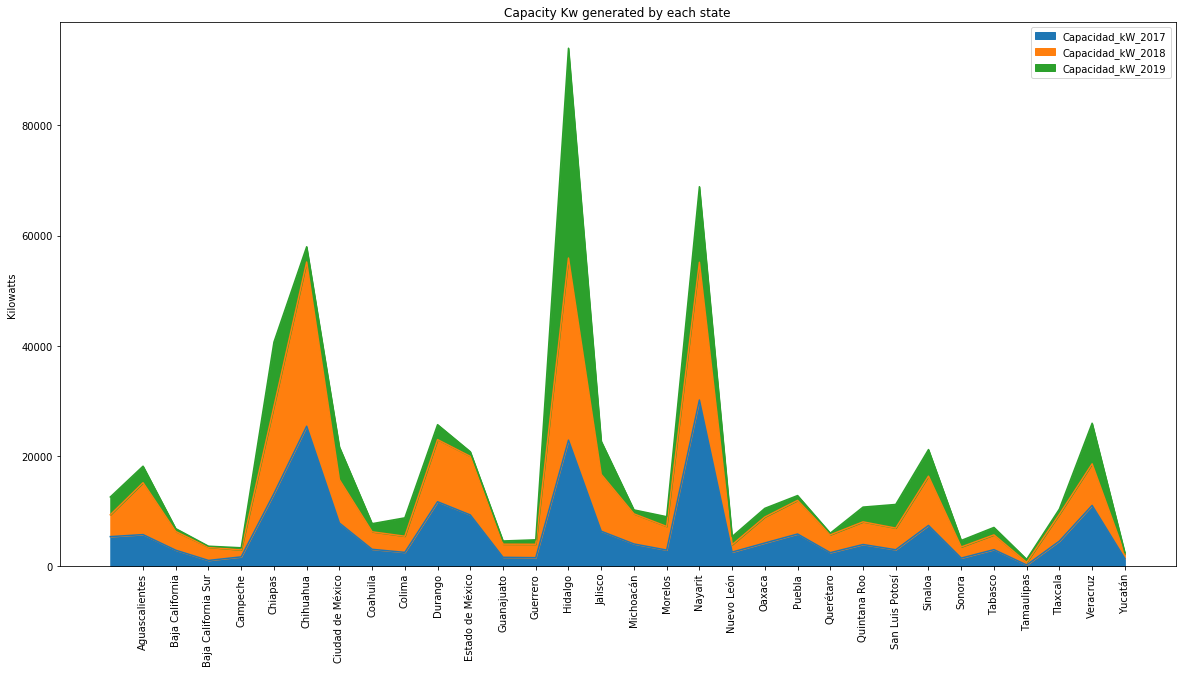

In [12]:
#Area plot to show growth
ax = capacity_df.plot.area(figsize=(20,10))

ax.set_title("Capacity Kw generated by each state")
ax.set_xticklabels(capacity_df.Estado,rotation=90, minor=False)
ax.set_xticks(range(1,32)) 
ax.set_ylabel("Kilowatts")
ax

In [13]:
top_PIBE = pib_df.nlargest(5, ["PIB_2017", "PIB_2018", "PIB_2019"])
top_PIBE

,Estado,PIB_2017,PIB_2018,PIB_2019
8,Ciudad de México,2957233.594,3045539.859,3128247.710
14,Estado de México,1485467.443,1556925.971,1605830.823
18,Nuevo León,1257648.421,1306549.097,1353874.513
13,Jalisco,1149129.548,1176616.034,1207897.462
29,Veracruz,784930.108,776072.856,794376.310


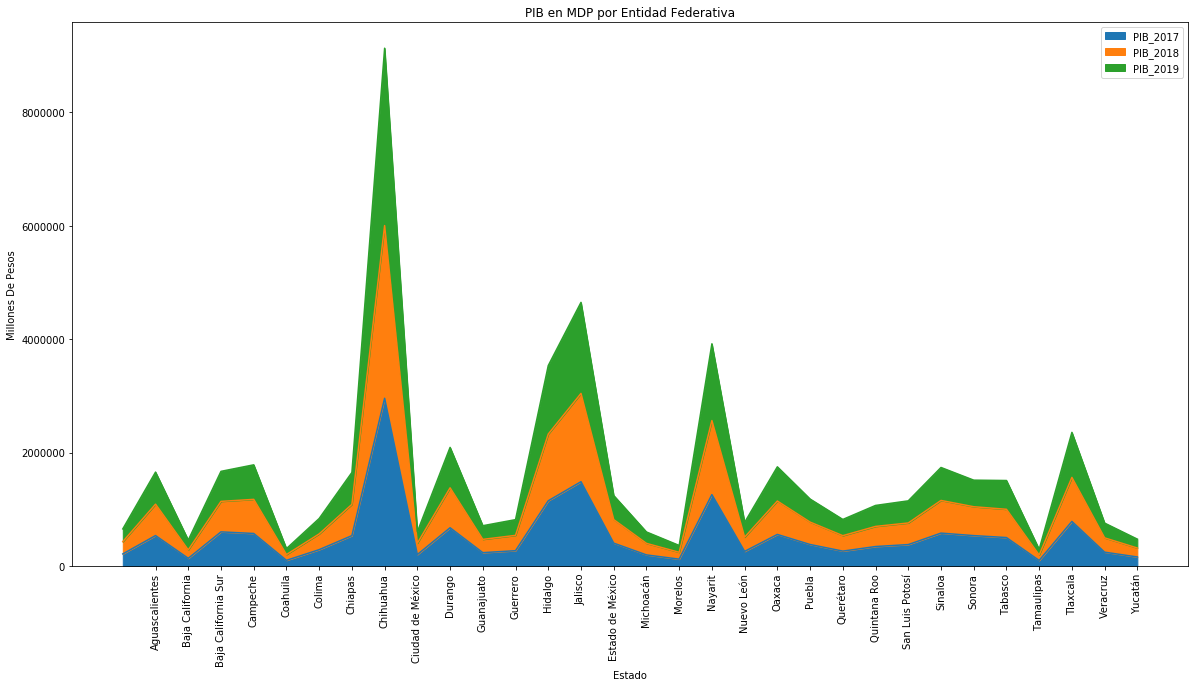

In [14]:
plt = pib_df.plot.area(figsize=(20,10))

plt.set_title('PIB en MDP por Entidad Federativa')
plt.set_xlabel('Estado')
plt.set_ylabel('Millones De Pesos')
plt.set_xticklabels(pib_df.Estado,rotation=90, )
plt.set_xticks(range(1,32)) 
# Show graphic
plt
# Save plot
#plt.savefig("Output Data/PIB en MDP vs. año")


## API Google maps requests

### Getting Latitude and Longitud for each State

In [15]:
grouped_df['Lat'] = ""
grouped_df['Lng'] = ""
#group_df.reset_index(inplace = True)
#group_df
#for index, row in group_df.iterrows():
# create a params dict that will be updated with new city each iteration
params = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in grouped_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    state = row['Estado']

    # update address key value
    params['address'] = f"{state},Mexico"

    # make request
    states_lat_lng = requests.get(base_url, params=params)
    
        
    # convert to json
    states_lat_lng = states_lat_lng.json()

    grouped_df.loc[index, "Lat"] = states_lat_lng["results"][0]["geometry"]["location"]["lat"]
    grouped_df.loc[index, "Lng"] = states_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
#grouped_df
#  

## Heatmap showing Total electric capacity for State

In [16]:
# Store 'Lat' and 'Lng' into  locations 
locations = grouped_df[["Lat", "Lng"]].astype(float)
capacidad_instalada = grouped_df["Capacidad de la central eléctrica (kW)"].astype(float)

print(len(locations),len(capacidad_instalada))
# Create a Humidity layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=capacidad_instalada/1000, 
                                 dissipating=False, max_intensity=10,
                                 point_radius = .5)

fig.add_layer(heat_layer)


fig

32 32


Figure(layout=FigureLayout(height='420px'))

In [17]:
info_box_template = """
<dl>
<dt>State</dt><dd>{Estado}</dd>
<dt>Electric capactiy (Kw)</dt><dd>{Capacidad_kW_2019}</dd>
<dt>PIB (MDP) $</dt><dd>{PIB_2019}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
analysis_info = [info_box_template.format(**row) for index, row in grouped_df.iterrows()]

In [18]:
# Create PIB symbol layer
PIB_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content= analysis_info
)


fig = gmaps.figure()
fig.add_layer(PIB_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
# Create a combined map
fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(PIB_layer)

fig

Figure(layout=FigureLayout(height='420px'))

## Heatmap showing average solar radiation for State

In [20]:
# Store 'Lat' and 'Lng' into  locations 
locations = grouped_df[["Lat", "Lng"]].astype(float)
actividad_solar = grouped_df["Radiacion"].astype(float)

print(len(locations),len(actividad_solar))
# Create a Humidity layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=actividad_solar, 
                                 dissipating=False, max_intensity=10,
                                 point_radius = 2
                                )
heat_layer.gradient = [ 'blue','red']
fig.add_layer(heat_layer)


fig

32 32


Figure(layout=FigureLayout(height='420px'))